## Using the ATM-diag class for nextGEMS cycle 3 data

In [9]:
from aqua import Reader, catalogue, inspect_catalogue
import os
import sys
%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_directory)

from atm_global_mean import AGM_diag

env: PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/:/home/b/b382257/.conda/envs/aqua/bin/:/home/b/b382257/.conda/envs/aqua/bin/:/home/b/b382257/.conda/envs/aqua/bin/:/home/b/b382257/.conda/envs/aqua/bin/


In [12]:
cat = catalogue()
inspect_catalogue(cat)

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-monthly	LRA data monthly at r100
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-monthly	LRA data monthly at r100
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y
IFS	tco25

['IFS',
 'FESOM',
 'ICON',
 'MSWEP',
 'ERA5',
 'CERES',
 'AVISO',
 'PHC3',
 'WOA18',
 'OSI-SAF']

In [20]:
plotdir = './plots/AtmGlobalBiases/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

In [16]:
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve(fix=True)

reader_tco2559 = Reader(model = 'IFS', exp = 'tco2559-ng5-cycle3', source = 'lra-r100-monthly')
data_tco2559 = reader_tco2559.retrieve(fix = False)

reader_tco1279 = Reader(model="IFS", exp="tco1279-orca025-cycle3",source = 'lra-r100-monthly')
data_tco1279 = reader_tco1279.retrieve()

2023-06-22 11:39:39 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco2559-ng5-cycle3, source lra-r100-monthly
2023-06-22 11:39:41 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source lra-r100-monthly


NameError: name 'plotdir' is not defined

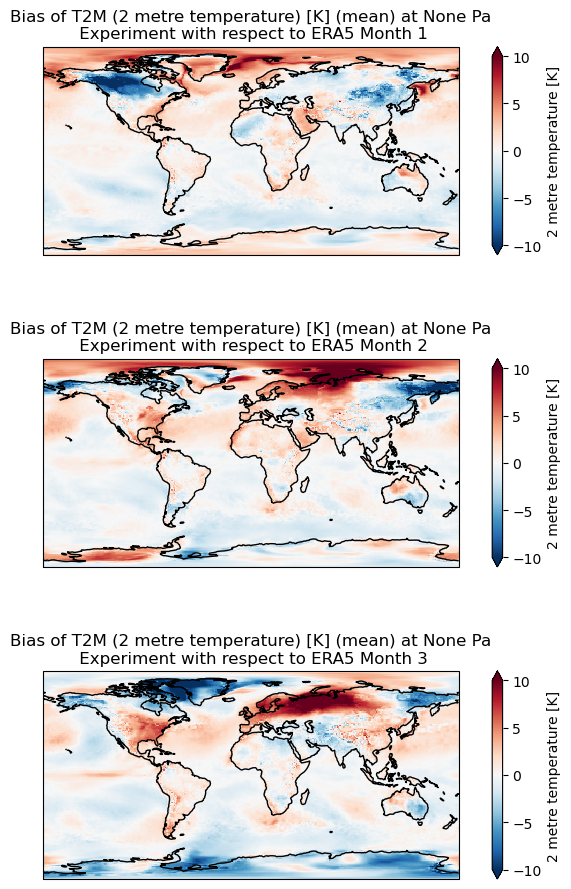

In [21]:
# Call function for Temperature Biases
result, bias_map =  AGM_diag.compare_datasets(data_tco2559, data_era5, '2t', 'T2M', slice('2020-01-01', '2020-04-01'), plev = None, statistic = 'mean')

In [22]:
result, bias_map = AGM_diag.compare_datasets_plev(data_tco2559, data_era5, 't', 'T', slice('2020-01-01', '2020-12-01'), plot_latitude=True) 

KeyError: 't'

In [25]:
data_tco2559
# has no variables like LRA from cycle 2

<xarray.Dataset>
Dimensions:  (time: 60, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables: (12/15)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    msntrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msshfl   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtnsrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtntrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    nsss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>